In [1]:
import tensorflow as tf
import numpy as np
from numpy.random import multivariate_normal, permutation
import matplotlib.pyplot as plt
import pandas as pd 
from pandas import DataFrame, Series

In [2]:
# 난수 발생
np.random.seed(20180427)

In [3]:
n0 = 20 #사이즈 20개 난수 생성
mu0 = [10,11] # n 차원 분포의 평균
variance0 = 20 #
# multivariate_normal(mean, cov[, size, check_valid, tol])
# np.eye(2)
# [[1. 0.]
#  [0. 1.]]
data0 = multivariate_normal(mu0, np.eye(2) * variance0, n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t']=0
"""
print (mu0)
print ()
print (np.eye(2)* variance0)
print ()
print (data0)
print ()
print (df0)
print ()
print (df0)
"""

'\nprint (mu0)\nprint ()\nprint (np.eye(2)* variance0)\nprint ()\nprint (data0)\nprint ()\nprint (df0)\nprint ()\nprint (df0)\n'

In [4]:
n1 = 15
mu1 = [18,20]
variance1 = 22

data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1

#print (df1)

In [5]:
df = pd.concat([df0,df1], ignore_index = True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)
#train_set

In [6]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])  # [35,1] 행렬로 변환

In [7]:
# t = 1 인 확률을 구하는 식 
x = tf.placeholder(tf.float32,[None,2])
w = tf.Variable(tf.zeros([2,1]))
w0 = tf.Variable(tf.zeros([1]))

f = tf.matmul(x,w) + w0
p = tf.sigmoid(f)


In [8]:
# 오차 함수 와 트레이닝 알고리즘(경사하강법) 선언
t = tf.placeholder(tf.float32,[None,1])
costFunction = -tf.reduce_sum(t * tf.log(p) + (1-t)*tf.log(1-p))
#trainOptimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
trainOptimizer = tf.train.AdamOptimizer()
train = trainOptimizer.minimize(costFunction)


In [9]:
# tf.sign(x)  x의 값에 따라 부호를 반환 음수 이면 -1, 0이면 0 양수이면 1 반환
# tf.equal(x,y) x와 y 값이 같은지 bool 값 반환
# tf.cast(x, dtype) 텐서 타입으로 형 변환 
prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
itrNum = 0 
for _ in range(20000):
    itrNum += 1
    trainValue, costFunctionValue, accuracyValue = sess.run([train, costFunction, accuracy], feed_dict = {x:train_x, t:train_t})
    if (itrNum % 2000 == 0) :
        print ("Step : %d, cost(loss) : %f , accuracy : %f" %(itrNum, costFunctionValue, accuracyValue))
        

Step : 2000, cost(loss) : 16.837086 , accuracy : 0.914286
Step : 4000, cost(loss) : 12.956228 , accuracy : 0.914286
Step : 6000, cost(loss) : 10.605146 , accuracy : 0.914286
Step : 8000, cost(loss) : 9.106233 , accuracy : 0.885714
Step : 10000, cost(loss) : 8.134092 , accuracy : 0.885714
Step : 12000, cost(loss) : 7.503965 , accuracy : 0.885714
Step : 14000, cost(loss) : 7.101247 , accuracy : 0.885714
Step : 16000, cost(loss) : 6.852186 , accuracy : 0.914286
Step : 18000, cost(loss) : 6.708144 , accuracy : 0.914286
Step : 20000, cost(loss) : 6.635507 , accuracy : 0.914286


In [12]:
w0Value, wValue = sess.run([w0,w])
w0Value, w1Value, w2Value = w0Value[0], wValue[0][0], wValue[1][0]
print(w0Value, w1Value, w2Value)

print (w0Value)
print (wValue)

-15.210439 0.44210607 0.55269885
-15.210439
[[0.44210607]
 [0.55269885]]


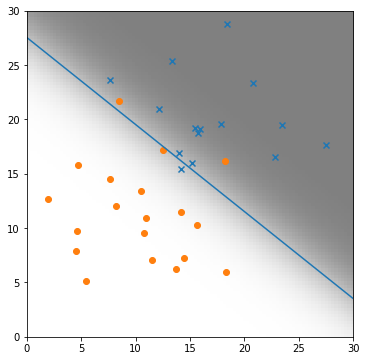

In [13]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (w1Value*linex/w2Value + w0Value/w2Value)
subplot.plot(linex, liney)

field = [[(1 / (1 + np.exp(-(w0Value + w1Value*x1 + w2Value*x2))))
          for x1 in np.linspace(0,30,100)]
         for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)